In [31]:
# Import packages required for matrix and graphic representations
import numpy as np
import pandas as pd

# Data Visualisation
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Configuración warnings
# ------------------------------------------------------------------------------
import warnings
#warnings.filterwarnings('once')
warnings.filterwarnings('ignore')

In [32]:
# Data Loading

WQ = pd.read_excel('waterquality.xlsx')


#Removing "Unnamed" columns 
#admissions= admissions[['admit', 'gre', 'gpa', 'rank']]

print ("Clean Size WQ", WQ.shape)

print("Type", type(WQ))

WQ.head()

Clean Size WQ (7996, 21)
Type <class 'pandas.core.frame.DataFrame'>


,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1


In [33]:
WQ.info() # variables included in the DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7996 entries, 0 to 7995
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   float64
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uraniu

In [34]:
# Cheking NaN /null values
WQ.isnull().sum()*100/WQ.shape[0]


aluminium      0.0
ammonia        0.0
arsenic        0.0
barium         0.0
cadmium        0.0
chloramine     0.0
chromium       0.0
copper         0.0
flouride       0.0
bacteria       0.0
viruses        0.0
lead           0.0
nitrates       0.0
nitrites       0.0
mercury        0.0
perchlorate    0.0
radium         0.0
selenium       0.0
silver         0.0
uranium        0.0
is_safe        0.0
dtype: float64

In [35]:
WQ.describe()  # Only numerical variables are presented

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
count,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,...,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000,7996.000000
mean,0.666396,14.278212,0.161477,1.567928,0.042803,2.177589,0.247300,0.805940,0.771646,0.319714,...,0.099431,9.819250,1.329846,0.005193,16.465266,2.920106,0.049684,0.147811,0.044672,0.114057
std,1.265323,8.878930,0.252632,1.216227,0.036049,2.567210,0.270663,0.653595,0.435423,0.329497,...,0.058169,5.541977,0.573271,0.002967,17.688827,2.322805,0.028773,0.143569,0.026906,0.317900
min,0.000000,-0.080000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,6.577500,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.407500,0.000000,...,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000,0.000000
50%,0.070000,14.130000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,...,0.102000,9.930000,1.420000,0.005000,7.745000,2.410000,0.050000,0.080000,0.050000,0.000000
75%,0.280000,22.132500,0.100000,2.482500,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,...,0.151000,14.610000,1.760000,0.008000,29.487500,4.670000,0.070000,0.240000,0.070000,0.000000
max,5.050000,29.840000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,...,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000,1.000000


In [36]:
print(" WQ shape",WQ.shape)



 WQ shape (7996, 21)


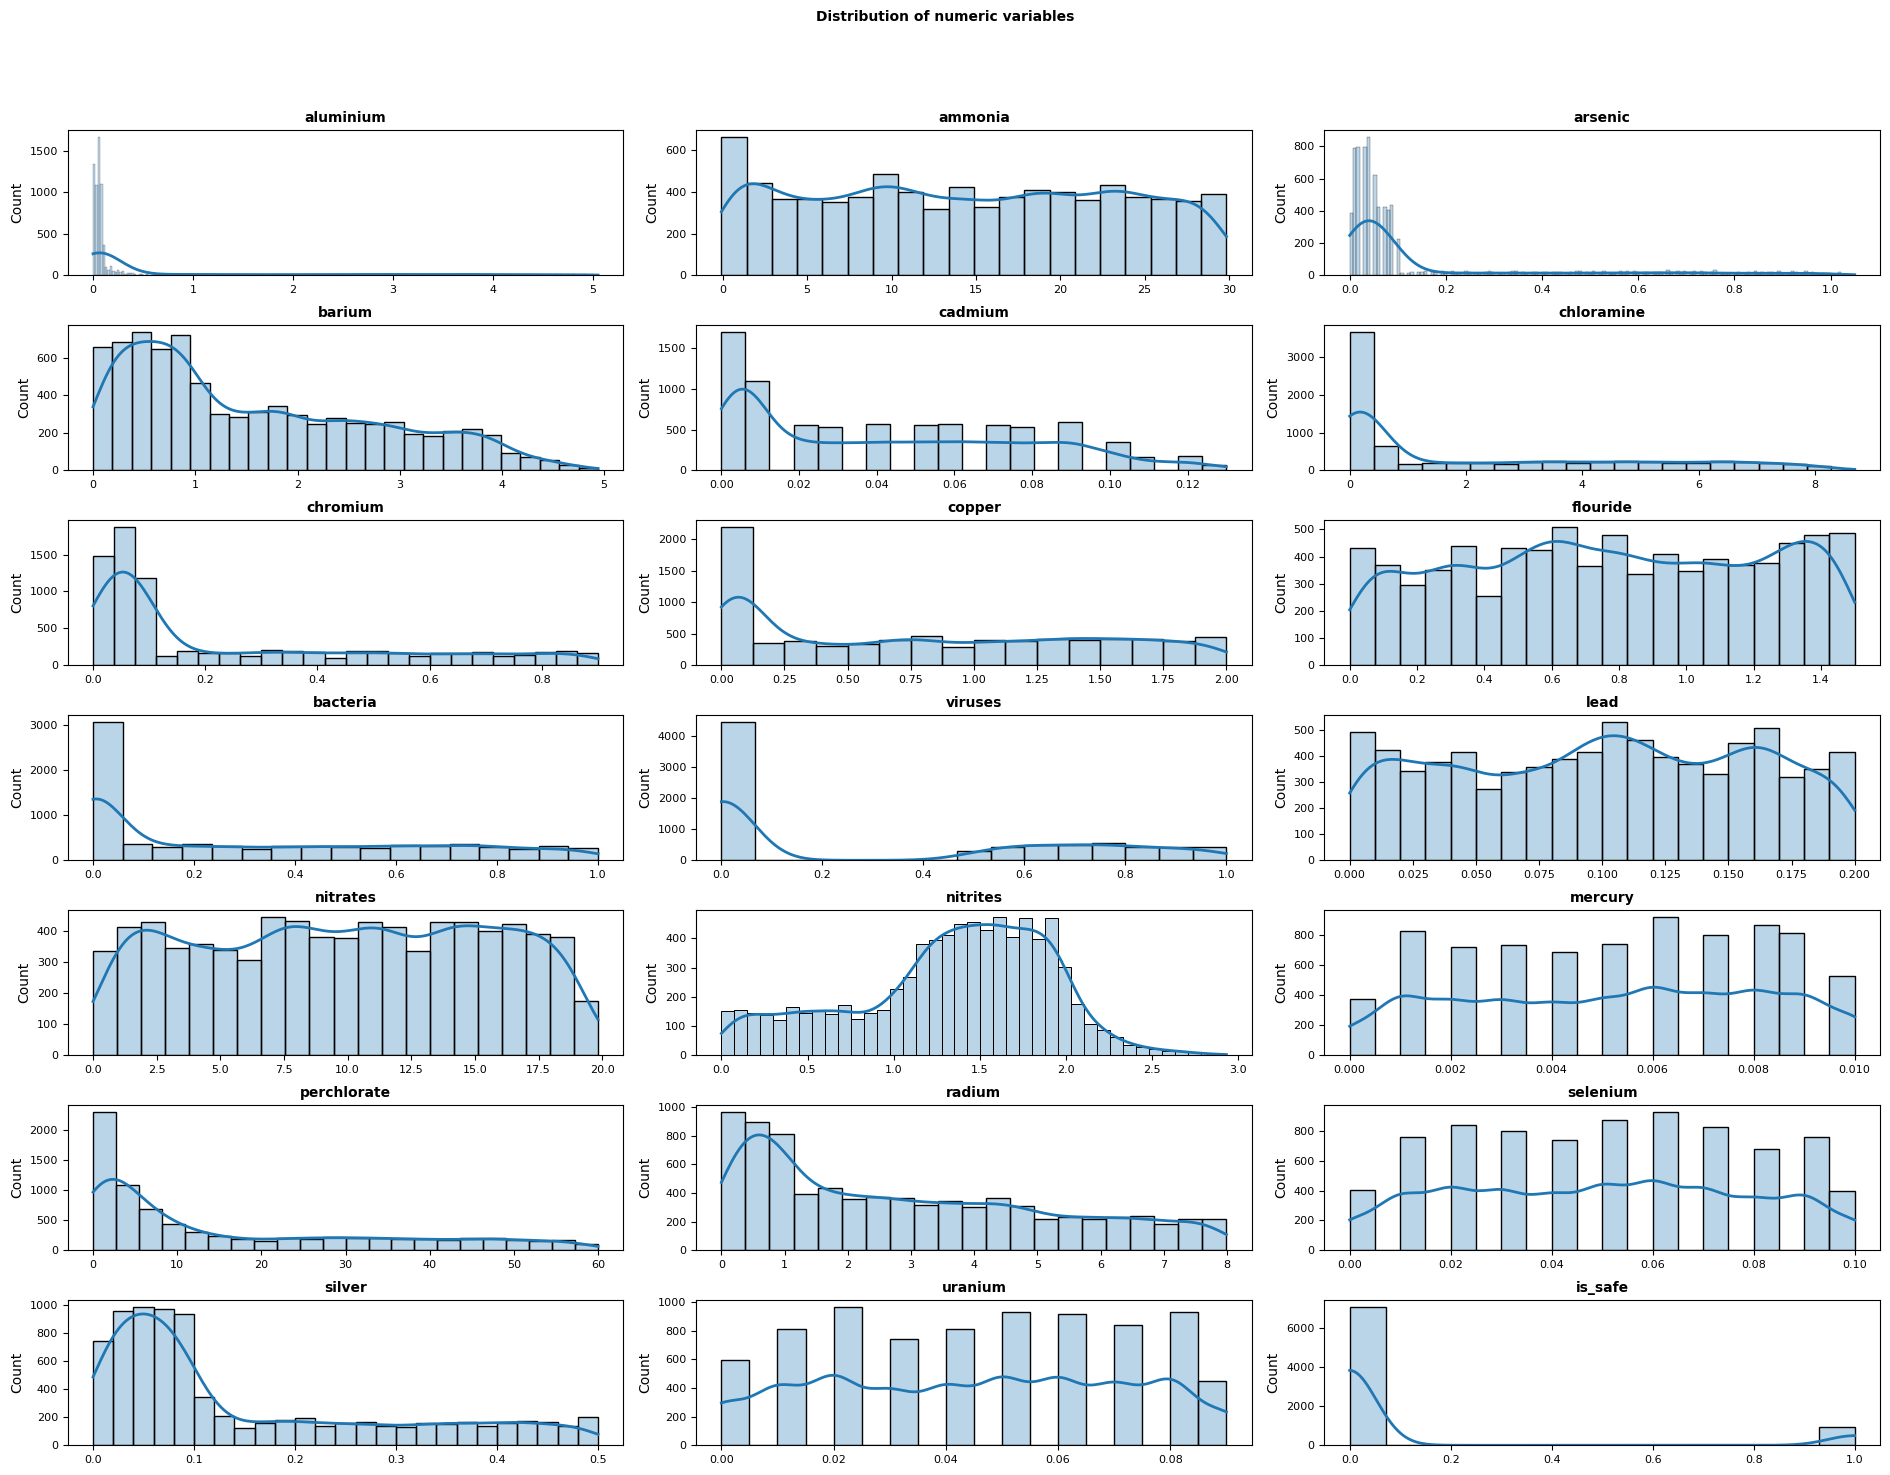

In [37]:
# Distribution of each variable
# ==============================================================================
# Fit number of subplots to the number of columns
fig, axes = plt.subplots(nrows=7, ncols=3, figsize=(19, 15))
axes = axes.flat
#col_numeric = juices.select_dtypes(include=['float64', 'int']).columns # when only numeric coluns are selected

col_numeric = WQ.columns

for i, colum in enumerate(col_numeric):
    sns.histplot(
        data    = WQ,
        x       = colum,
        stat    = "count",
        kde     = True,
        #color   = (list(plt.rcParams['axes.prop_cycle'])*2)[i]["color"],
        line_kws= {'linewidth': 2},
        alpha   = 0.3,
        ax      = axes[i]
    )
    axes[i].set_title(colum, fontsize = 10, fontweight = "bold")
    axes[i].tick_params(labelsize = 8)
    axes[i].set_xlabel("")


    
fig.tight_layout()
plt.subplots_adjust(top = 0.9)
fig.suptitle('Distribution of numeric variables', fontsize = 10, fontweight = "bold");

In [38]:
# plot numerical data as pairs
# sns.pairplot(WQ);

In [39]:
# count of each category value
print(WQ["is_safe"].value_counts())


0    7084
1     912
Name: is_safe, dtype: int64


Visto lo anterior hay alguna relación perfectamente lineal que saldrá en el modelo 

PREPARAMOS CONJUNTO DE ENTRENAMIENTO Y TEST

In [40]:
# Once the variables to use are known, we proceed to prepare the dataset with a partition for training and another one for test
###############################################################################################################################

from sklearn.model_selection import train_test_split

# Dividing the dataset in training and test
# ==============================================================================
#X = data.iloc[:, [0, 1, 2, 4, 5, 6, 7, 8]]
X=WQ.loc[:,WQ.columns!='is_safe']
y = WQ['is_safe']


X_train, X_test, y_train, y_test = train_test_split(
                                        X,
                                        #y.values.reshape(-1,1),
                                        y,
                                        train_size   = 0.8,  # 80% for training
                                        random_state = 1234,
                                        shuffle      = True
                                    )


PRIMER MODELO DE REGRESION LOGISTICA

In [41]:
import statsmodels.api as sm

# Fit the logistic resgression line using ‘logit’
model = sm.Logit(y_train,sm.add_constant(X_train)).fit()

print(model.summary())


Optimization terminated successfully.
         Current function value: 0.248018
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                is_safe   No. Observations:                 6396
Model:                          Logit   Df Residuals:                     6375
Method:                           MLE   Df Model:                           20
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.3174
Time:                        16:39:03   Log-Likelihood:                -1586.3
converged:                       True   LL-Null:                       -2323.8
Covariance Type:            nonrobust   LLR p-value:                9.389e-301
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7624      0.260      2.935      0.003       0.253       1.272
aluminium       0.7465    

In [42]:
# Akaike criteria
model.aic

3214.64523703091

Eliminamos variables que no explican la potabilidad del agua frente a su no potabilidad

In [43]:
#simplyfing the model
# flouride, lead
# ==============================================================================
X_train = X_train.drop(columns = ['flouride', 'lead'])
X_test = X_test.drop(columns = ['flouride', 'lead'])

In [44]:
# Fit the logistic resgression line using ‘logit’
model = sm.Logit(y_train,sm.add_constant(X_train)).fit()

print(model.summary())

Optimization terminated successfully.
         Current function value: 0.248340
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                is_safe   No. Observations:                 6396
Model:                          Logit   Df Residuals:                     6377
Method:                           MLE   Df Model:                           18
Date:                Tue, 17 Oct 2023   Pseudo R-squ.:                  0.3165
Time:                        16:39:03   Log-Likelihood:                -1588.4
converged:                       True   LL-Null:                       -2323.8
Covariance Type:            nonrobust   LLR p-value:                8.761e-302
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.7072      0.235      3.007      0.003       0.246       1.168
aluminium       0.7439    

In [45]:
# Akaike criteria
model.aic


3214.760988857658

Parece modelo correcto. Hagamos exporacion de su performance

In [46]:
# performing predictions on the training dataset
# ==============================================================================

from sklearn.metrics import accuracy_score
# from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
predict_train = model.predict(exog = X_train)
clas_train = np.where(predict_train < 0.4, 0, 1)  # 0.4 can be changed

# Accuracy in training 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clas_train,
            normalize = True
           )
print("")
print(f" Accuracy in training is: {100*accuracy}%")


 Accuracy in training is: 90.47842401500938%


In [47]:
# Confusion matrix for training
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_train.ravel(),
    clas_train,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,5451,189
1,420,336


Preocupan eso 189 casos en training que damos por agua potable cuando no lo es

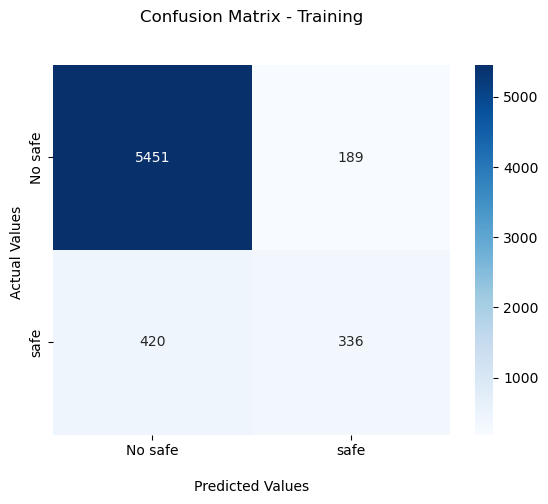

In [48]:
#Plotting Confusion matrix 
#import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix - Training\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No safe','safe'])
ax.yaxis.set_ticklabels(['No safe','safe'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [49]:
# performing predictions on the test dataset
# ==============================================================================

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predict_test = model.predict(exog = X_test)
clas_test = np.where(predict_test < 0.4, 0, 1)  # 0.4 can be changed

# Accuracy in test 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clas_test,
            normalize = True
           )
print("")
print(f" Accuracy in test is: {100*accuracy}%")


 Accuracy in test is: 90.875%


In [50]:
# Confusion matrix for test
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clas_test,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1397,47
1,99,57


Siguen preocupando esos 47 casos de test

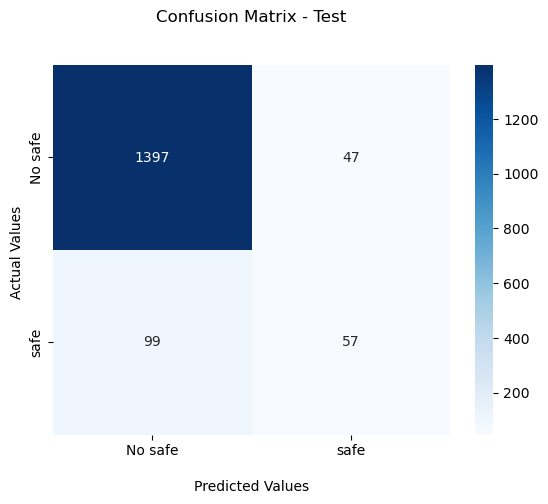

In [51]:
#Plotting Confusion matrix 
#import seaborn as sns

ax = sns.heatmap(confusion_matrix, annot=True, cmap='Blues', fmt='g')

ax.set_title('Confusion Matrix - Test\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['No safe','safe'])
ax.yaxis.set_ticklabels(['No safe','safe'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [52]:
#Libraries required for ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

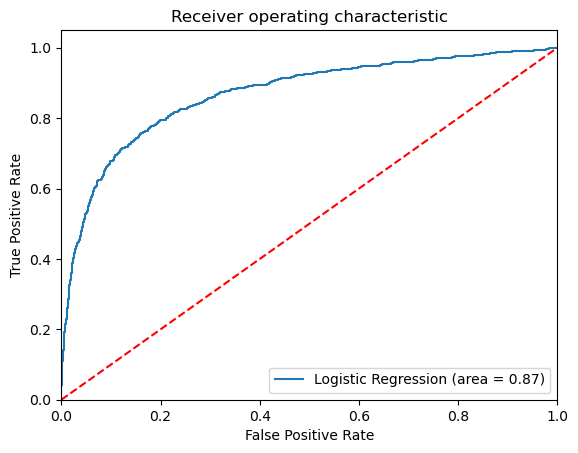

AUC: 0.868


In [53]:
# ROC curve for the test dataset

logit_roc_auc = roc_auc_score(y_train, model.predict(exog = X_train)) # AUC estimatiion
fpr, tpr, thresholds = roc_curve(y_train, model.predict(exog = X_train))  #ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

...
# calculate AUC
auc = roc_auc_score(y_train, model.predict(exog = X_train))
print('AUC: %.3f' % auc)

Calculamos TPR, FPR y umbrales

1. Calculate the predicted probabilities of each observation in the dataset using the logistic regression model.
2. Calculate the TPR and FPR at various threshold settings.
3. Select the threshold setting more convenient.

In [54]:
#from sklearn.metrics import roc_curve

# Calculate the predicted probabilities of each observation
#y_pred_prob = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate and true positive rate at various threshold settings
fpr, tpr, thresholds = roc_curve(y_train, predict_train)

Prefeririamos para este caso un TPR alto y un FPR bajo y eso va en línea del índice de Youden que vamos a calcular



In [55]:
# Calculate the Youden index at each threshold setting
j_scores = tpr-fpr

# Find the threshold setting that maximizes the Youden index
optimal_idx = np.argmax(j_scores)
optimal_threshold = thresholds[optimal_idx]

In [56]:
print ("optimal_threshold, tpr, fpr", optimal_threshold, tpr[optimal_idx], fpr[optimal_idx])

optimal_threshold, tpr, fpr 0.13746038354359266 0.7552910052910053 0.15833333333333333


In [57]:
# performing predictions on the training dataset AFTER Youden index
# ==============================================================================

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
predict_train = model.predict(exog = X_train)
clas_train = np.where(predict_train < optimal_threshold, 0, 1)  # 0.4 can be changed

# Accuracy in training 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clas_train,
            normalize = True
           )
print("")
print(f" Accuracy in training is: {100*accuracy}%")


 Accuracy in training is: 83.14571607254534%


In [58]:
# Confusion matrix for training
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_train.ravel(),
    clas_train,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,4747,893
1,185,571


De lo que hemos visto al coger un umbral de 0.4 y ahora el de youden de 0.137 es que el numero de casos real no safe y predichos safe
han aumentado y eso puede ser peligroso de ahí que vamos a proponer un umbral más alto para asegurar que los casos 
con probabilidad alta sean realmente los de agua segura


In [59]:
optimal_threshold=0.9

In [60]:
# performing predictions on the training dataset AFTER Youden index
# ==============================================================================

from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_train = sm.add_constant(X_train, prepend=True)
predict_train = model.predict(exog = X_train)
clas_train = np.where(predict_train < optimal_threshold, 0, 1)  # 0.4 can be changed

# Accuracy in training 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_train,
            y_pred    = clas_train,
            normalize = True
           )
print("")
print(f" Accuracy in training is: {100*accuracy}%")


 Accuracy in training is: 88.69606003752345%


In [61]:
# Confusion matrix for training
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_train.ravel(),
    clas_train,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,5638,2
1,721,35


In [62]:
# performing predictions on the test dataset
# ==============================================================================

#from sklearn.metrics import accuracy_score
#from sklearn.metrics import plot_confusion_matrix

# Predicted classification
# ==============================================================================
X_test = sm.add_constant(X_test, prepend=True)
predict_test = model.predict(exog = X_test)
clas_test = np.where(predict_test < 0.9, 0, 1)  # 0.4 can be changed

# Accuracy in test 
# ==============================================================================
accuracy = accuracy_score(
            y_true    = y_test,
            y_pred    = clas_test,
            normalize = True
           )
print("")
print(f" Accuracy in test is: {100*accuracy}%")


 Accuracy in test is: 90.625%


In [63]:
# Confusion matrix for tesy
# ==============================================================================
confusion_matrix = pd.crosstab(
    y_test.ravel(),
    clas_test,
    rownames=['Real'],
    colnames=['Predicción']
)
confusion_matrix

Predicción,0,1
Real,,
0,1444,0
1,150,6


In [64]:
# Prediction using the model 
y_pred_df = pd.DataFrame({'actual':y_train,'predicted_prob':model.predict(exog=sm.add_constant(X_train))})
y_pred_df

,actual,predicted_prob
5341,1,0.038428
6646,0,0.016664
896,0,0.035498
1638,1,0.386092
3599,0,0.068369
...,...,...
3276,0,0.053286
7221,0,0.093520
1318,0,0.587356
723,0,0.602341


In [65]:
#Now sort predicted probabilities  in  descending order
y_pred_df = pd.DataFrame({'actual':y_train,'predicted_prob':model.predict(exog=sm.add_constant(X_train))})
sorted_predict_df = y_pred_df[['predicted_prob',
                               'actual']].sort_values('predicted_prob',
                                                                       ascending = False)
sorted_predict_df 

,predicted_prob,actual
406,0.969103,1
102,0.960074,1
549,0.957200,1
401,0.957161,1
618,0.956937,1
...,...,...
3195,0.000265,0
3671,0.000261,0
1395,0.000233,0
3143,0.000218,0


In [66]:
num_per_decile = int(len(sorted_predict_df)/10)
print("Number of observation per decile: ",num_per_decile)

Number of observation per decile:  639


In [67]:
#Function to get decile(split data into ten equal parts)
def get_deciles(df):
    df['decile']=1
    idx = 0
    for each_d in range(0,10):
        df.iloc[idx:idx+num_per_decile,df.columns.get_loc('decile')]= each_d
        idx += num_per_decile
    df['decile'] = df['decile']+1
    return df

In [68]:
deciles_predict_df = get_deciles(sorted_predict_df)
deciles_predict_df

,predicted_prob,actual,decile
406,0.969103,1,1
102,0.960074,1,1
549,0.957200,1,1
401,0.957161,1,1
618,0.956937,1,1
...,...,...,...
3195,0.000265,0,2
3671,0.000261,0,2
1395,0.000233,0,2
3143,0.000218,0,2


In [69]:
gain_lift_df= pd.DataFrame(deciles_predict_df.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df.columns = ['decile','gain']
gain_lift_df

,decile,gain
0,1,385
1,2,157
2,3,76
3,4,46
4,5,26
5,6,18
6,7,14
7,8,13
8,9,12
9,10,9


In [70]:
gain_lift_df['gain_percentage']=(100 * gain_lift_df.gain.cumsum()/gain_lift_df.gain.sum())
gain_lift_df


,decile,gain,gain_percentage
0,1,385,50.925926
1,2,157,71.693122
2,3,76,81.746032
3,4,46,87.830688
4,5,26,91.269841
5,6,18,93.650794
6,7,14,95.502646
7,8,13,97.222222
8,9,12,98.809524
9,10,9,100.000000


In [71]:
#Above you notice that more than 70% of the cases are in first two deciles

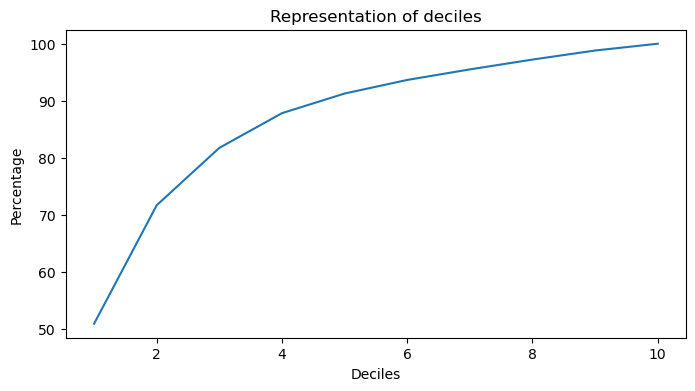

In [72]:
plt.figure(figsize = (8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['gain_percentage'],'-')
plt.xlabel('Deciles')
plt.ylabel('Percentage')
plt.title('Representation of deciles')
plt.show()


In [73]:
#Now,calculate lift to see how good deciles are
gain_lift_df['lift']= (gain_lift_df.gain_percentage/(gain_lift_df.decile * 10))
gain_lift_df

,decile,gain,gain_percentage,lift
0,1,385,50.925926,5.092593
1,2,157,71.693122,3.584656
2,3,76,81.746032,2.724868
3,4,46,87.830688,2.195767
4,5,26,91.269841,1.825397
5,6,18,93.650794,1.560847
6,7,14,95.502646,1.364324
7,8,13,97.222222,1.215278
8,9,12,98.809524,1.097884
9,10,9,100.000000,1.000000


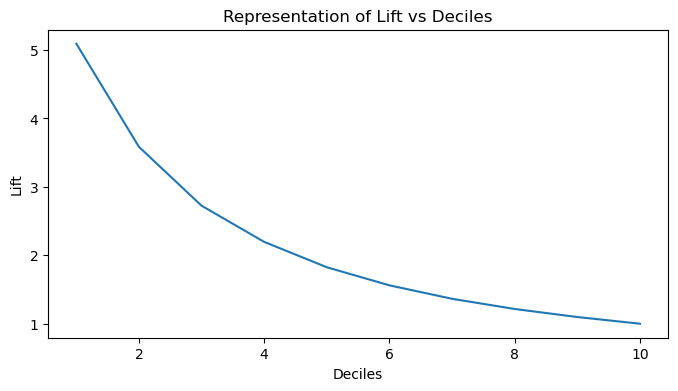

In [74]:
plt.figure(figsize=(8,4))
plt.plot(gain_lift_df['decile'],gain_lift_df['lift'],'-')
plt.xlabel('Deciles')
plt.ylabel('Lift')
plt.title('Representation of Lift vs Deciles')
plt.show()


In [75]:
#Developing model using Logistic Regression SKLearn Package
from sklearn.linear_model import LogisticRegression

In [76]:
logit = LogisticRegression()
#Fitting model with X and Y values of dataset
logit.fit(X_train,y_train)

LogisticRegression()

In [77]:
pred_y = logit.predict_proba(X_train)
pred_y[0:6,]  # probabilty of each class


array([[0.91125605, 0.08874395],
       [0.9788536 , 0.0211464 ],
       [0.95858241, 0.04141759],
       [0.60959696, 0.39040304],
       [0.86747678, 0.13252322],
       [0.9511054 , 0.0488946 ]])

In [78]:
type(pred_y)

numpy.ndarray

In [79]:
y_pred_df_new = pd.DataFrame({'actual':y_train,'predicted_prob': pred_y[:,1]})
y_pred_df_new.head()


,actual,predicted_prob
5341,1,0.088744
6646,0,0.021146
896,0,0.041418
1638,1,0.390403
3599,0,0.132523


In [80]:
sorted_predict_df_new = y_pred_df_new[['predicted_prob','actual']].sort_values('predicted_prob',ascending =False)
deciles_predict_df_new = get_deciles(sorted_predict_df_new)
deciles_predict_df_new[0:20]

,predicted_prob,actual,decile
549,0.936264,1,1
102,0.935458,1,1
921,0.928146,1,1
459,0.926978,1,1
890,0.924534,1,1
401,0.923292,1,1
493,0.921685,1,1
406,0.921021,1,1
916,0.910973,1,1
532,0.905237,1,1


In [81]:
gain_lift_df_new = pd.DataFrame(deciles_predict_df_new.groupby('decile')['actual'].sum()).reset_index()
gain_lift_df_new.columns = ['decile','gain']
gain_lift_df_new['gain_percentage']=(100*gain_lift_df_new.gain.cumsum()/gain_lift_df_new.gain.sum())
gain_lift_df_new

,decile,gain,gain_percentage
0,1,357,47.222222
1,2,169,69.576720
2,3,80,80.158730
3,4,56,87.566138
4,5,31,91.666667
5,6,9,92.857143
6,7,9,94.047619
7,8,12,95.634921
8,9,12,97.222222
9,10,21,100.000000


In [82]:
gain_lift_df_new['lift']=(gain_lift_df_new.gain_percentage / (gain_lift_df_new.decile * 10))
gain_lift_df_new

,decile,gain,gain_percentage,lift
0,1,357,47.222222,4.722222
1,2,169,69.576720,3.478836
2,3,80,80.158730,2.671958
3,4,56,87.566138,2.189153
4,5,31,91.666667,1.833333
5,6,9,92.857143,1.547619
6,7,9,94.047619,1.343537
7,8,12,95.634921,1.195437
8,9,12,97.222222,1.080247
9,10,21,100.000000,1.000000


In [83]:
#We can also calculate Lift and Gain curves by just writting a single line of code 


<Axes: title={'center': 'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

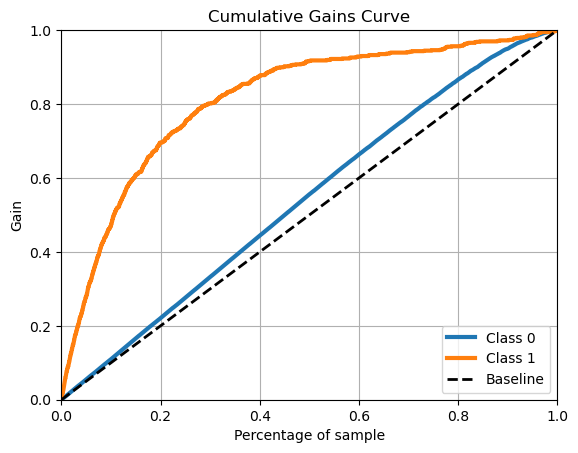

In [84]:
import scikitplot as skplt
#following line is used to find Gains Curve
skplt.metrics.plot_cumulative_gain(y_train,pred_y)

<Axes: title={'center': 'Lift Curve'}, xlabel='Percentage of sample', ylabel='Lift'>

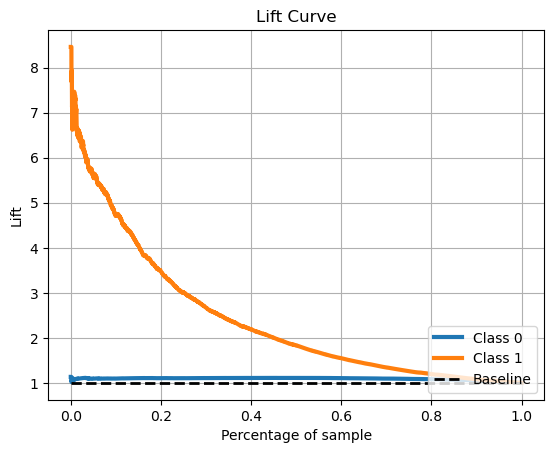

In [85]:
#Following line is used to find Lift curve
skplt.metrics.plot_lift_curve(y_train,pred_y)

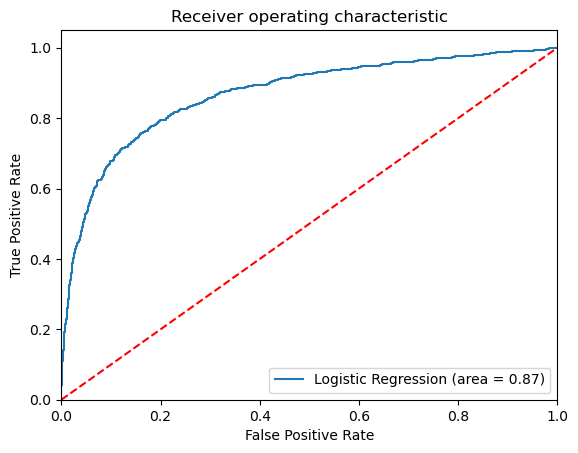

AUC: 0.868


In [86]:
#Libraries required for ROC curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve


# ROC curve for the dataset
logit_roc_auc = roc_auc_score(y_train, model.predict(exog = sm.add_constant(X_train))) # AUC estimatiion
fpr, tpr, thresholds = roc_curve(y_train, model.predict(exog = sm.add_constant(X_train)))  #ROC curve
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

...
# calculate AUC
auc = roc_auc_score(y_train, model.predict(exog = sm.add_constant(X_train)))
print('AUC: %.3f' % auc)